<h1>Locate a New Laundromat in Walla Walla, Washington</h1>

Applied Data Science Capstone
<br>Nathan Rathge

<h2>Table of Contents</h2>

- Introduction/Business Problem
- Data
- Methodology, Analysis & Results
- Discussion & Conclusion.

<h2>Introduction/Business Problem</h2>

A client would like to know the best location for a laundromat in Walla Walla, WA.

A new laundromat would need to be located where there are no other laudromats nearby, but there are other factors. A successful laundromat needs customers. Customers for laundromats may not have a washer and dryer at home, or may be traveling, or may want to do multiple loads at a time. The reasons why a customer may use a laundromat may be varied or mysterious. With the assumption that successful laundromats would have similar items nearby, data will first be collected about existing laundromats, and then applied to find similar areas of the city that do not have a laundromat.

<h2>Data</h2>

Using the Foursquare API, laundromats in Walla Walla will be found.  The locations near these laundromats will be analyzed, in the hopes of finding similar venues nearby, or finding patterns of venues.  Using that information, a search of the entire Walla Walla metro area will hopefully reveal an area which has similar characteristics, yet does not have a laundromat in the area and may have a need for one.

Some characteristics to look for are:
- similar venues
- distance to travel-related locations

<h2>Methodology, Analysis & Results</h2>

Using the Foursquare API Documentation, a link was found that showed all the venue types and codes used by Foursqare:
- https://developer.foursquare.com/docs/build-with-foursquare/categories/

The page was searched and Laundromat (52f2ab2ebcbc57f1066b8b33) was found and directly below it, Laundry Service (4bf58dd8d48988d1fc941735).  

In [1]:
CLIENT_ID = 'HIDDEN' # Foursquare ID
CLIENT_SECRET = 'HIDDEN' # Foursquare secret
VERSION = '20180605' # Foursquare API version
NEARCITY = 'Walla%20Walla%2C%20WA'
CATEGORIES = '52f2ab2ebcbc57f1066b8b33,4bf58dd8d48988d1fc941735'
LIMIT = 20 # Limit value
RADIUS = 11265 # By using Apple Maps, it was estimated that Walla Walla had a radius of 7 miles (11,265 meters)

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HIDDEN
CLIENT_SECRET:HIDDEN


In [2]:
# Remember, Foursquare parameters are case sensitive (categoryId, not categoryid)
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&near={}&categoryId={}&limit={}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    NEARCITY,
    CATEGORIES,
    LIMIT,
    RADIUS)
url # display URL

'https://api.foursquare.com/v2/venues/search?client_id=HIDDEN&client_secret=HIDDEN&v=20180605&near=Walla%20Walla%2C%20WA&categoryId=52f2ab2ebcbc57f1066b8b33,4bf58dd8d48988d1fc941735&limit=20&radius=11265'

Load required data dependencies.

In [3]:
import numpy as np # scientific computing in Python
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [4]:
#!pip install geopy
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         392 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch

Send the GET request and examine the results.

In [5]:
results = requests.get(url).json()
#results   # Results examined and commented out for the report.

Create an empty dataframe for the laundromat locations.  Loop through the data to populate the dataframe.

In [6]:
column_names = ['laundryname','latitude','longitude']
laundries = pd.DataFrame(columns=column_names)

venues = results['response']['venues']

i = 0
for data in venues:
    launname = venues[i]['name']
    lattylongy = venues[i]['location']
    latty = lattylongy['lat']
    longy = lattylongy['lng']

    laundries = laundries.append({'laundryname': launname,
                                    'latitude': latty,
                                    'longitude': longy}, ignore_index=True)
    i=i+1
laundries

,laundryname,latitude,longitude
0,Stewart's French Dry Cleaners,46.066834,-118.335336
1,T-N-T Suds,46.055144,-118.331953
2,Eastgate Laundry Corner,46.075333,-118.310162
3,Stewarts Cleanimg,46.068022,-118.335073
4,Southgate Center Laundromat,46.055180,-118.331902
5,Andy's Laundermat,46.039616,-118.387010
6,Speed Wash Coin Operated Laundry,46.075743,-118.305243


Seven locations are found in Walla Walla.  These locations are shown on a map.

In [7]:
# Coordinates of Walla Walla obtained from results, above.
wallat = 46.06458
wallng = -118.34302

venues_map = folium.Map(location=[wallat, wallng], zoom_start=13) # generate map centred around Walla Walla

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [wallat, wallng],
    radius=10,
    color='red',
    popup='Walla Walla',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

# add the laundry services as blue circle markers
for latx, lngx, launame in zip(laundries['latitude'], laundries['longitude'], laundries['laundryname']):
    launame = folium.Popup(launame, parse_html=True)
    folium.CircleMarker(
        [latx, lngx],
        radius=5,
        color='blue',
        popup=launame,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6).add_to(venues_map)

# display map
venues_map

The map appears to show four different clusters of locations: Southwest, Central, South Central and Northeast. A k-means clustering algorithm will be used to form the four centroids of the laundromat areas.

In [8]:
import matplotlib.pyplot as plt # plotting library # backend for rendering plots within the browser %matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
print('Libraries imported.')

Libraries imported.


In [9]:
# create an array for latitude & longitude as X,Y values
X=[[0]]*7
Y=[[0]]*7
Z=[[0]*2]*7
n=0
for latx, lngx in zip(laundries['latitude'], laundries['longitude']):
    X[n]=lngx
    Y[n]=latx
    Z[n]=[X[n],Y[n]]
    n=n+1
Z

[[-118.33533600000001, 46.066834],
 [-118.331953, 46.055144],
 [-118.310162, 46.075333],
 [-118.33507343776056, 46.06802239525107],
 [-118.33190155029297, 46.055179595947266],
 [-118.38701039135303, 46.03961569112464],
 [-118.30524299999999, 46.075743]]

In [10]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

A plot of the values is created to verify they are the same as the values in the map.

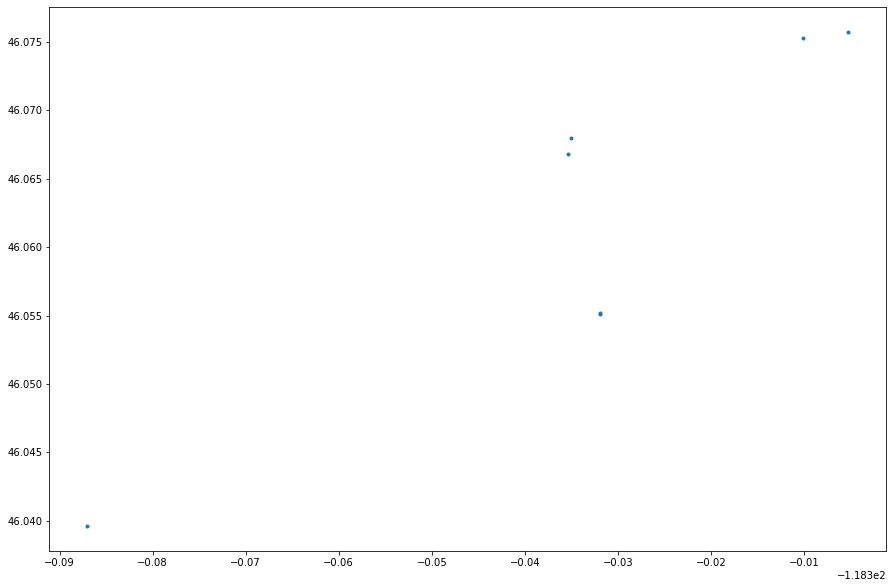

In [11]:
plt.figure(figsize=(15, 10))
plt.scatter(X, Y, marker='.')

The K-Means ananlsys is then used to find the four cluster coordinates.

In [12]:
k_means.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
k_means_cluster_centers = k_means.cluster_centers_
Xk=k_means_cluster_centers[:,0]
Yk=k_means_cluster_centers[:,1]
k_means_cluster_centers

array([[-118.33520472,   46.0674282 ],
       [-118.38701039,   46.03961569],
       [-118.3077025 ,   46.075538  ],
       [-118.33192728,   46.0551618 ]])

Now we would like to create a loop which gets the Foursquare data nearest each of the four locations.

In [14]:
radius = 804 #One half of a mile is 804 meters.
LIMIT = 100 #Limit for foursquare free users

url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Y[0], 
    X[0], 
    radius, 
    LIMIT)
url2 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HIDDEN&client_secret=HIDDEN&v=20180605&ll=46.066834,-118.33533600000001&radius=804&limit=100'

In [15]:
results2 = requests.get(url2).json()
#results2

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results2['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Colville Street Patisserie,Bakery,46.067108,-118.336130
1,Graze,Sandwich Place,46.067707,-118.336784
2,Sweet Basil,Pizza Place,46.067051,-118.337528
3,Maple Counter Cafe,Breakfast Spot,46.067211,-118.335710
4,Public House 124,Bar,46.068402,-118.336472


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

48 venues were returned by Foursquare.


In [19]:
def getNearbyVenues(latitudes, longitudes, radius=804):
    
    venues_list=[]
    for lat, lng in zip(latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([( 
            lat, 
            lng,  
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            str(lat)+", "+str(lng),
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Neighborhood Coords',
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
wallalaundry_venues = getNearbyVenues(Yk,Xk)

In [21]:
print(wallalaundry_venues.shape)
wallalaundry_venues

(95, 7)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Neighborhood Coords,Venue Category
0,46.067428,-118.335205,Colville Street Patisserie,46.067108,-118.336130,"46.06742819762553, -118.33520471888028",Bakery
1,46.067428,-118.335205,Graze,46.067707,-118.336784,"46.06742819762553, -118.33520471888028",Sandwich Place
2,46.067428,-118.335205,Sweet Basil,46.067051,-118.337528,"46.06742819762553, -118.33520471888028",Pizza Place
3,46.067428,-118.335205,Maple Counter Cafe,46.067211,-118.335710,"46.06742819762553, -118.33520471888028",Breakfast Spot
4,46.067428,-118.335205,Public House 124,46.068402,-118.336472,"46.06742819762553, -118.33520471888028",Bar
5,46.067428,-118.335205,Brasserie Four,46.066828,-118.339077,"46.06742819762553, -118.33520471888028",French Restaurant
6,46.067428,-118.335205,El Corazon Winery,46.068799,-118.334208,"46.06742819762553, -118.33520471888028",Winery
7,46.067428,-118.335205,Bacon & Eggs,46.067765,-118.337706,"46.06742819762553, -118.33520471888028",Restaurant
8,46.067428,-118.335205,Bright's,46.067019,-118.338888,"46.06742819762553, -118.33520471888028",Dessert Shop
9,46.067428,-118.335205,Book & Game Company,46.067248,-118.337952,"46.06742819762553, -118.33520471888028",Bookstore


In [22]:
wallalaundry_venues_grouped = wallalaundry_venues.groupby('Neighborhood Coords').count()
wallalaundry_venues_grouped

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood Coords,,,,,,
"46.03961569112464, -118.38701039135303",11,11,11,11,11,11
"46.05516179797363, -118.33192727514648",5,5,5,5,5,5
"46.06742819762553, -118.33520471888028",48,48,48,48,48,48
"46.075538, -118.3077025",31,31,31,31,31,31


In [23]:
print('There are {} uniques categories.'.format(len(wallalaundry_venues['Venue Category'].unique())))

There are 54 uniques categories.


In [24]:
# one hot encoding
wallalaundry_onehot = pd.get_dummies(wallalaundry_venues[['Venue Category']], prefix="", prefix_sep="")

# add latitude column back to dataframe
wallalaundry_onehot['Group Coords'] = wallalaundry_venues['Neighborhood Coords']

# move neighborhood column to the first column
fixed_columns = [wallalaundry_onehot.columns[-1]] + list(wallalaundry_onehot.columns[:-1])
wallalaundry_onehot = wallalaundry_onehot[fixed_columns]

wallalaundry_onehot.head()

,Group Coords,ATM,American Restaurant,Arcade,Automotive Shop,Bakery,Bank,Bar,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Café,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Credit Union,Department Store,Dessert Shop,Fast Food Restaurant,French Restaurant,Frozen Yogurt Shop,Gas Station,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hotel,Ice Cream Shop,Italian Restaurant,Lounge,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Motel,Other Repair Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Post Office,Restaurant,Sandwich Place,Tanning Salon,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Wine Bar,Wine Shop,Winery,Wings Joint
0,"46.06742819762553, -118.33520471888028",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"46.06742819762553, -118.33520471888028",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,"46.06742819762553, -118.33520471888028",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,"46.06742819762553, -118.33520471888028",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"46.06742819762553, -118.33520471888028",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
wallalaundry_onehot.shape

(95, 55)

In [26]:
wallalaundry_grouped = wallalaundry_onehot.groupby('Group Coords').mean().reset_index()
wallalaundry_grouped

,Group Coords,ATM,American Restaurant,Arcade,Automotive Shop,Bakery,Bank,Bar,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Café,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Credit Union,Department Store,Dessert Shop,Fast Food Restaurant,French Restaurant,Frozen Yogurt Shop,Gas Station,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hotel,Ice Cream Shop,Italian Restaurant,Lounge,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Motel,Other Repair Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Post Office,Restaurant,Sandwich Place,Tanning Salon,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Wine Bar,Wine Shop,Winery,Wings Joint
0,"46.03961569112464, -118.38701039135303",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.090909,0.000000,0.090909,0.000000,0.000000,0.090909,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000
1,"46.05516179797363, -118.33192727514648",0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"46.06742819762553, -118.33520471888028",0.020833,0.083333,0.020833,0.000000,0.041667,0.020833,0.020833,0.000000,0.020833,0.020833,0.020833,0.000000,0.020833,0.000000,0.020833,0.041667,0.041667,0.0,0.000000,0.020833,0.000000,0.020833,0.000000,0.000000,0.020833,0.020833,0.020833,0.020833,0.083333,0.000000,0.020833,0.041667,0.020833,0.020833,0.020833,0.041667,0.000000,0.000000,0.000000,0.020833,0.000000,0.020833,0.000000,0.020833,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.041667,0.041667,0.020833
3,"46.075538, -118.3077025",0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.032258,0.000000,0.000000,0.032258,0.000000,0.032258,0.032258,0.064516,0.000000,0.064516,0.000000,0.0,0.032258,0.000000,0.129032,0.000000,0.032258,0.032258,0.032258,0.032258,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.064516,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.000000,0.000000,0.032258,0.032258,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
num_top_venues = 5

for hood in wallalaundry_grouped['Group Coords']:
    print("----"+str(hood)+"----")
    temp = wallalaundry_grouped[wallalaundry_grouped['Group Coords'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----46.03961569112464, -118.38701039135303----
            venue  freq
0     Pizza Place  0.09
1   Big Box Store  0.09
2     Coffee Shop  0.09
3     Post Office  0.09
4  Sandwich Place  0.09


----46.05516179797363, -118.33192727514648----
                venue  freq
0              Bakery   0.2
1       Grocery Store   0.2
2  Mexican Restaurant   0.2
3        Credit Union   0.2
4   Convenience Store   0.2


----46.06742819762553, -118.33520471888028----
                 venue  freq
0  American Restaurant  0.08
1                Hotel  0.08
2               Lounge  0.04
3               Winery  0.04
4            Wine Shop  0.04


----46.075538, -118.3077025----
                  venue  freq
0  Fast Food Restaurant  0.13
1           Coffee Shop  0.06
2    Chinese Restaurant  0.06
3    Mexican Restaurant  0.06
4        Sandwich Place  0.03




In [28]:
# The next step is to create a grid of coordinate pairs to go across the entire city of Walla Walla.
ycalc=[46.04, 46.05, 46.06, 46.07, 46.08]
xcalc=[-118.403, -118.387, -118.371, -118.355, -118.339, -118.323, -118.307, -118.291]
X2=[[0]]*40
Y2=[[0]]*40
Z2=[[0]*2]*40
n=0
for yloop in ycalc:
    for xloop in xcalc:
        if(xloop == -118.387):
            if(yloop == 46.04):
                X2[n]=-118.38701039
                Y2[n]=46.03961569
                Z2[n]=[-118.38701039,46.03961569]
                n=n+1
                continue
        if(xloop == -118.339):
            if(yloop == 46.06):
                X2[n]=-118.33192728
                Y2[n]=46.0551618
                Z2[n]=[-118.33192728,46.0551618]
                n=n+1
                continue
            if(yloop == 46.07):
                X2[n]=-118.33520472
                Y2[n]=46.0674282
                Z2[n]=[-118.33520472,46.0674282]
                n=n+1
                continue
        if(xloop == -118.307):
            if(yloop == 46.08):
                X2[n]=-118.3077025
                Y2[n]=46.075538
                Z2[n]=[-118.3077025,46.075538]
                n=n+1
                continue
        X2[n]=xloop
        Y2[n]=yloop
        Z2[n]=[xloop,yloop]
        n=n+1
Z2

[[-118.403, 46.04],
 [-118.38701039, 46.03961569],
 [-118.371, 46.04],
 [-118.355, 46.04],
 [-118.339, 46.04],
 [-118.323, 46.04],
 [-118.307, 46.04],
 [-118.291, 46.04],
 [-118.403, 46.05],
 [-118.387, 46.05],
 [-118.371, 46.05],
 [-118.355, 46.05],
 [-118.339, 46.05],
 [-118.323, 46.05],
 [-118.307, 46.05],
 [-118.291, 46.05],
 [-118.403, 46.06],
 [-118.387, 46.06],
 [-118.371, 46.06],
 [-118.355, 46.06],
 [-118.33192728, 46.0551618],
 [-118.323, 46.06],
 [-118.307, 46.06],
 [-118.291, 46.06],
 [-118.403, 46.07],
 [-118.387, 46.07],
 [-118.371, 46.07],
 [-118.355, 46.07],
 [-118.33520472, 46.0674282],
 [-118.323, 46.07],
 [-118.307, 46.07],
 [-118.291, 46.07],
 [-118.403, 46.08],
 [-118.387, 46.08],
 [-118.371, 46.08],
 [-118.355, 46.08],
 [-118.339, 46.08],
 [-118.323, 46.08],
 [-118.3077025, 46.075538],
 [-118.291, 46.08]]

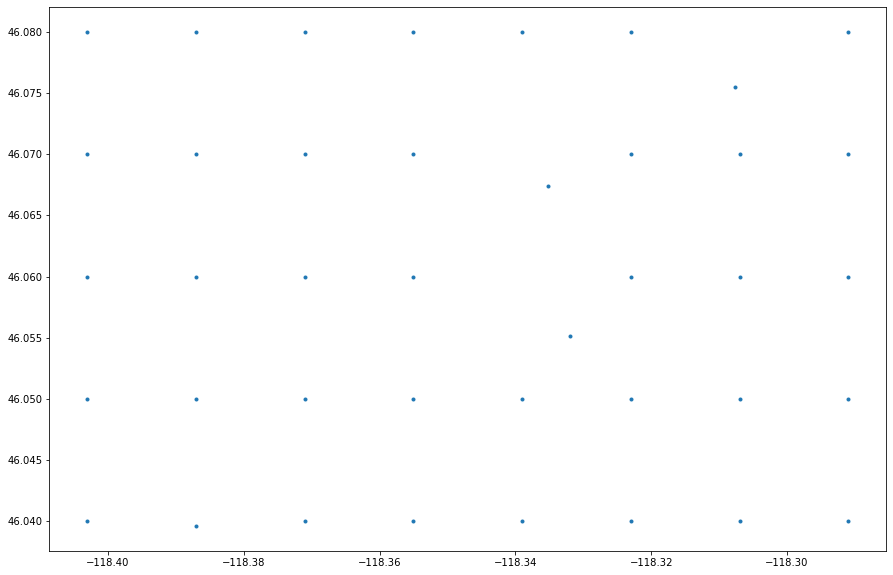

In [30]:
plt.figure(figsize=(15, 10))
plt.scatter(X2, Y2, marker='.')

In [31]:
dataframe=pd.DataFrame(Z2,columns=['longitude','latitude'])
dataframe.head()

,longitude,latitude
0,-118.40300,46.040000
1,-118.38701,46.039616
2,-118.37100,46.040000
3,-118.35500,46.040000
4,-118.33900,46.040000


In [32]:
venues_map2 = folium.Map(location=[wallat, wallng], zoom_start=13) # generate map centred around Walla Walla

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [wallat, wallng],
    radius=10,
    color='red',
    popup='Walla Walla',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map2)

# add the laundry services as blue circle markers
for latx2,lngx2 in zip(dataframe['latitude'],dataframe['longitude']):
    folium.CircleMarker(
        [latx2, lngx2],
        radius=5,
        color='blue',
        popup='',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6).add_to(venues_map2)

# display map
venues_map2

Now it is time to loop through all of the 40 locations and get the data from Foursquare.

In [33]:
new_neighborhood_venues = getNearbyVenues(Y2,X2)
new_neighborhood_venues.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Neighborhood Coords,Venue Category
0,46.040000,-118.40300,R & G Lawn Care & Irrigation,46.046406,-118.398312,"46.04, -118.403",Construction & Landscaping
1,46.039616,-118.38701,Andy's Market,46.039552,-118.387003,"46.03961569, -118.38701039",Grocery Store
2,46.039616,-118.38701,GameStop,46.034210,-118.380885,"46.03961569, -118.38701039",Video Game Store
3,46.039616,-118.38701,Papa Murphy's,46.033749,-118.380979,"46.03961569, -118.38701039",Pizza Place
4,46.039616,-118.38701,Petco,46.039572,-118.387039,"46.03961569, -118.38701039",Pet Store


In [34]:
print(new_neighborhood_venues.shape)

(338, 7)


In [35]:
new_neighborhood_venues_grouped = new_neighborhood_venues.groupby('Neighborhood Coords').count()
new_neighborhood_venues_grouped

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood Coords,,,,,,
"46.03961569, -118.38701039",11,11,11,11,11,11
"46.04, -118.307",4,4,4,4,4,4
"46.04, -118.323",3,3,3,3,3,3
"46.04, -118.339",1,1,1,1,1,1
"46.04, -118.355",8,8,8,8,8,8
"46.04, -118.371",4,4,4,4,4,4
"46.04, -118.403",1,1,1,1,1,1
"46.05, -118.291",1,1,1,1,1,1
"46.05, -118.307",4,4,4,4,4,4


In [36]:
print('There are {} uniques categories.'.format(len(new_neighborhood_venues['Venue Category'].unique())))

There are 103 uniques categories.


In [37]:
# one hot encoding
allhoods_onehot = pd.get_dummies(new_neighborhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
allhoods_onehot['Neighborhood Coords'] = new_neighborhood_venues['Neighborhood Coords'] 

# move neighborhood column to the first column
allfixed_columns = [allhoods_onehot.columns[-1]] + list(allhoods_onehot.columns[:-1])
allhoods_onehot = allhoods_onehot[allfixed_columns]

allhoods_onehot.head()

,Neighborhood Coords,ATM,American Restaurant,Amphitheater,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Assisted Living,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bed & Breakfast,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Business Service,Café,Casino,Chinese Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Farm,Fast Food Restaurant,Food,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hotel,Ice Cream Shop,Italian Restaurant,Laundromat,Lounge,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pawn Shop,Pet Store,Pharmacy,Pizza Place,Playground,Post Office,RV Park,Rental Car Location,Resort,Restaurant,Salon / Barbershop,Sandwich Place,Shipping Store,Soccer Field,Social Club,Spa,Sporting Goods Shop,Steakhouse,Tanning Salon,Thai Restaurant,Theater,Track,Trail,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Wine Bar,Wine Shop,Winery,Wings Joint,Zoo
0,"46.04, -118.403",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"46.03961569, -118.38701039",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"46.03961569, -118.38701039",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,"46.03961569, -118.38701039",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"46.03961569, -118.38701039",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
allhoods_grouped = allhoods_onehot.groupby('Neighborhood Coords').mean().reset_index()
allhoods_grouped

,Neighborhood Coords,ATM,American Restaurant,Amphitheater,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Assisted Living,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bed & Breakfast,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Business Service,Café,Casino,Chinese Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Farm,Fast Food Restaurant,Food,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hotel,Ice Cream Shop,Italian Restaurant,Laundromat,Lounge,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pawn Shop,Pet Store,Pharmacy,Pizza Place,Playground,Post Office,RV Park,Rental Car Location,Resort,Restaurant,Salon / Barbershop,Sandwich Place,Shipping Store,Soccer Field,Social Club,Spa,Sporting Goods Shop,Steakhouse,Tanning Salon,Thai Restaurant,Theater,Track,Trail,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Wine Bar,Wine Shop,Winery,Wings Joint,Zoo
0,"46.03961569, -118.38701039",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.090909,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.090909,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,0.00,0.000000,0.000000,0.090909,0.000000,0.00,0.000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.090909,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.00
1,"46.04, -118.307",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"46.04, -118.323",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.333333,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000

In [38]:
num_top_venues = 5

for hood2 in allhoods_grouped['Neighborhood Coords']:
    print("----"+hood2+"----")
    temp = allhoods_grouped[allhoods_grouped['Neighborhood Coords'] == hood2].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----46.03961569, -118.38701039----
                           venue  freq
0                    Post Office  0.09
1                    Video Store  0.09
2                 Sandwich Place  0.09
3                    Gas Station  0.09
4  Vegetarian / Vegan Restaurant  0.09


----46.04, -118.307----
    venue  freq
0   Hotel  0.25
1  Resort  0.25
2   Track  0.25
3    Farm  0.25
4     ATM  0.00


----46.04, -118.323----
               venue  freq
0                Bar  0.33
1              Track  0.33
2            Theater  0.33
3  Mobile Phone Shop  0.00
4        Pizza Place  0.00


----46.04, -118.339----
                        venue  freq
0  Construction & Landscaping   1.0
1                         ATM   0.0
2     Health & Beauty Service   0.0
3                  Playground   0.0
4                 Pizza Place   0.0


----46.04, -118.355----
         venue  freq
0      Dog Run  0.25
1        Hotel  0.12
2    Pet Store  0.12
3  Social Club  0.12
4    BBQ Joint  0.12


----46.04, -118.371----
 

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = allhoods_grouped['Neighborhood Coords']

for ind in np.arange(allhoods_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(allhoods_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"46.03961569, -118.38701039",Grocery Store,Vegetarian / Vegan Restaurant,Sandwich Place,Big Box Store,Coffee Shop
1,"46.04, -118.307",Resort,Hotel,Track,Farm,Zoo
2,"46.04, -118.323",Track,Theater,Bar,Zoo,Dog Run
3,"46.04, -118.339",Construction & Landscaping,Zoo,Farm,Coffee Shop,Convenience Store
4,"46.04, -118.355",Dog Run,Pet Store,Hotel,BBQ Joint,Bank
5,"46.04, -118.371",Pet Store,Brewery,BBQ Joint,Sporting Goods Shop,Zoo
6,"46.04, -118.403",Construction & Landscaping,Zoo,Farm,Coffee Shop,Convenience Store
7,"46.05, -118.291",Brewery,Zoo,Chinese Restaurant,Coffee Shop,Construction & Landscaping
8,"46.05, -118.307",Gym,Baseball Field,Other Repair Shop,Farm,Gas Station
9,"46.05, -118.323",Playground,Vacation Rental,Credit Union,Theater,Dog Run


In [49]:
# set number of clusters
kclusters = 19

allhoods_grouped_clustering = allhoods_grouped.drop('Neighborhood Coords', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(allhoods_grouped_clustering)

In [50]:
# add clustering labels
allhoods_merged = pd.DataFrame()
allhoods_merged['Neighborhood Coords'] = new_neighborhood_venues_grouped.index
allhoods_merged.insert(0, 'Cluster Labels', kmeans.labels_)

column_names2 = ['latitude','longitude']
hoodcoords = pd.DataFrame(columns=column_names2)
templatlng = allhoods_merged['Neighborhood Coords']
for data2 in templatlng:
    latty2=float(data2.split(", ")[0])
    longy2=float(data2.split(", ")[1])
    hoodcoords = hoodcoords.append({'latitude': latty2, 'longitude': longy2}, ignore_index=True)
hoodcoords

allhoods_merged['latitude']=hoodcoords['latitude']
allhoods_merged['longitude']=hoodcoords['longitude']

allhoods_merged

,Cluster Labels,Neighborhood Coords,latitude,longitude
0,7,"46.03961569, -118.38701039",46.039616,-118.387010
1,16,"46.04, -118.307",46.040000,-118.307000
2,13,"46.04, -118.323",46.040000,-118.323000
3,2,"46.04, -118.339",46.040000,-118.339000
4,0,"46.04, -118.355",46.040000,-118.355000
5,0,"46.04, -118.371",46.040000,-118.371000
6,2,"46.04, -118.403",46.040000,-118.403000
7,3,"46.05, -118.291",46.050000,-118.291000
8,14,"46.05, -118.307",46.050000,-118.307000
9,17,"46.05, -118.323",46.050000,-118.323000


In [43]:
from scipy.spatial.distance import cdist
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [44]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,34)

for kclusters in K:
    #Building and fitting the model
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(allhoods_grouped_clustering)
#    kmeanModel = KMeans(n_clusters=kclusters).fit(X)
    kmeans.fit(allhoods_grouped_clustering)
      
    distortions.append(sum(np.min(cdist(allhoods_grouped_clustering, kmeans.cluster_centers_,'euclidean'),axis=1)) / allhoods_grouped_clustering.shape[0])
    inertias.append(kmeans.inertia_)

    mapping1[kclusters] = sum(np.min(cdist(allhoods_grouped_clustering, kmeans.cluster_centers_,'euclidean'),axis=1)) / allhoods_grouped_clustering.shape[0]
    mapping2[kclusters] = kmeans.inertia_

for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))

1 : 10.434510285047383
2 : 8.406056478303022
3 : 7.434183420047676
4 : 6.497410072316018
5 : 5.783780738439711
6 : 4.987374772153553
7 : 4.459995767611087
8 : 4.266929595903813
9 : 3.9794008077363405
10 : 3.6595149869108754
11 : 3.301639929326315
12 : 3.0835884114982557
13 : 2.8147223621625344
14 : 2.609718365691646
15 : 2.3991144776645967
16 : 2.2078214157259852
17 : 1.9198888698710252
18 : 1.6512387044289865
19 : 1.4391938348729423
20 : 1.3391756229845204
21 : 1.234814275980955
22 : 1.0031224727500916
23 : 0.8532651422118085
24 : 0.7689201339847784
25 : 0.6050027961587868
26 : 0.49172839633761944
27 : 0.39379558410060445
28 : 0.2880813427912396
29 : 0.21785498447154744
30 : 0.15535498447154744
31 : 0.09044236623657642
32 : 0.05512389614840073
33 : 0.023452949627310975


In [45]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 0.4912776664148215
2 : 0.44084087367173885
3 : 0.4128615285991437
4 : 0.38531003425504035
5 : 0.36566828206284924
6 : 0.3483837348019702
7 : 0.31394649982007466
8 : 0.30708525539990106
9 : 0.28706928285462324
10 : 0.27598918810914747
11 : 0.24718900468228341
12 : 0.2333702182795309
13 : 0.2342072593083508
14 : 0.21011411567203753
15 : 0.19297320796096717
16 : 0.18404681275337442
17 : 0.17299837272634125
18 : 0.1602286184805399
19 : 0.1467071320293841
20 : 0.135542555452886
21 : 0.12473192038391513
22 : 0.10346455560121989
23 : 0.09250957050177282
24 : 0.0867133531922592
25 : 0.07533876894978164
26 : 0.06260672553143068
27 : 0.053636573844234786
28 : 0.04417425800227465
29 : 0.037858596283782346
30 : 0.028037668767302522
31 : 0.020158724365562423
32 : 0.014148946339633305
33 : 0.00850679933180829


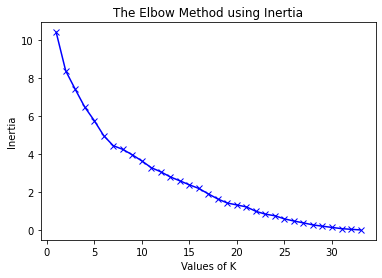

In [46]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

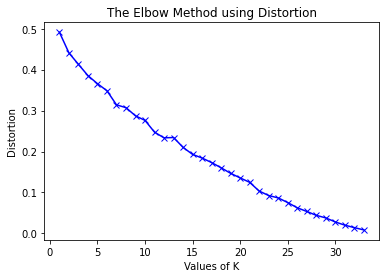

In [47]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [51]:
# create map
map_clusters = folium.Map(location=[wallat, wallng], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(allhoods_merged['latitude'], allhoods_merged['longitude'], allhoods_merged['Neighborhood Coords'], allhoods_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2>Discussion & Conclusion</h2>

The discussion and conclusion section is located in the report file.